In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lc_classifier.features.extractors.ulens_extractor import ulens_model_jax
from lc_classifier.utils import plot_astro_object

In [3]:
t = np.linspace(-50, 50, 1000)
mag = ulens_model_jax(t, u0=0.7, tE=20.0, fs=0.9, t0=30, mag_0=17.0)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


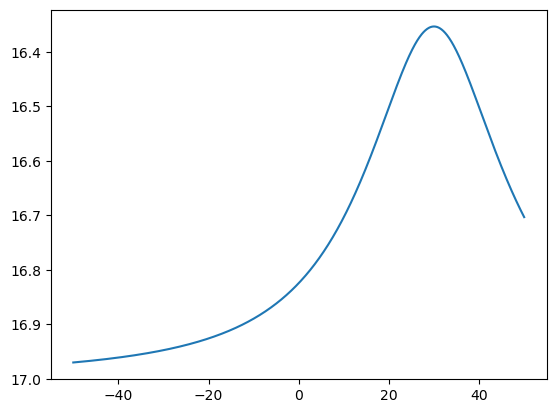

In [4]:
plt.plot(t, mag)
plt.gca().invert_yaxis()

In [5]:
!ls /home/ireyes/Projects/pipeline/training/lc_classifier_ztf/feature_computation/data_231206/

astro_objects_batch_000.pkl    lightcurves_batch_001.parquet
astro_objects_batch_001.pkl    lightcurves_batch_002.parquet
astro_objects_batch_002.pkl    lightcurves_batch_003.parquet
astro_objects_batch_003.pkl    lightcurves_batch_004.parquet
astro_objects_batch_004.pkl    lightcurves_batch_005.parquet
astro_objects_batch_005.pkl    lightcurves_batch_006.parquet
astro_objects_batch_006.pkl    lightcurves_batch_007.parquet
astro_objects_batch_007.pkl    lightcurves_batch_008.parquet
astro_objects_batch_008.pkl    lightcurves_batch_009.parquet
astro_objects_batch_009.pkl    lightcurves_batch_010.parquet
astro_objects_batch_010.pkl    lightcurves_batch_011.parquet
astro_objects_batch_011.pkl    lightcurves_batch_012.parquet
astro_objects_batch_012.pkl    lightcurves_batch_013.parquet
astro_objects_batch_013.pkl    lightcurves_batch_014.parquet
astro_objects_batch_014.pkl    lightcurves_batch_015.parquet
astro_objects_batch_015.pkl    lightcurves_batch_016.parquet
astro_objects_batch_016.

In [6]:
data_dir = '/home/ireyes/Projects/pipeline/training/lc_classifier_ztf/feature_computation/data_231206/'

In [7]:
objects_df = pd.read_parquet(os.path.join(data_dir, 'objects_with_wise_20240105.parquet'))
objects_df.head()

,ra,dec,submitter,alerceclass,oid,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,...,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,W1-W2,W2-W3
0,291.414602,-14.603520,amunoz,CV/Nova,ZTF21acasmne,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,293.431251,21.348710,amunoz,LPV,ZTF19aaonuwr,J193343.50+212055.5,293.431260,21.348767,0.0336,0.0326,...,1011,AAAA,28.0,36.0,44.0,34.0,0.105,0.207602,0.038000,0.657
2,86.770569,0.308770,amunoz,YSO,ZTF17aabhkmn,J054705.00+001832.5,86.770857,0.309037,0.0359,0.0335,...,330n,AABA,-466.0,36.0,-680.0,36.0,1.293,1.412567,0.431001,1.651
3,192.578746,43.709578,amunoz,QSO,ZTF18aatxhtl,J125018.91+434234.4,192.578809,43.709580,0.1356,0.1253,...,00nn,AABU,-36.0,441.0,412.0,476.0,NaN,0.162716,1.368000,2.701
4,156.578799,18.586220,amunoz,RSCVn,ZTF18aaadfyl,J102618.91+183510.4,156.578829,18.586238,0.0410,0.0386,...,00nn,AABU,6.0,52.0,110.0,54.0,0.172,0.122051,0.045000,0.189


In [8]:
objects_df['alerceclass'].unique()

array(['CV/Nova', 'LPV', 'YSO', 'QSO', 'RSCVn', 'SNII', 'Blazar', 'CEP',
       'EA', 'Periodic-Other', 'RRLab', 'SNIIn', 'RRLc', 'SNIa', 'AGN',
       'DSCT', 'EB/EW', 'Microlensing', 'SNIbc', 'SLSN', 'SNIIb', 'TDE',
       'ZZ'], dtype=object)

In [9]:
objects_df[objects_df['alerceclass'] == 'Microlensing'].head(20)

,ra,dec,submitter,alerceclass,oid,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,...,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,W1-W2,W2-W3
88,242.138791,9.705800,amunoz,Microlensing,ZTF20aawghfe,J160833.31+094220.9,242.138815,9.705817,0.1227,0.1131,...,00nn,AAUU,511.0,427.0,-494.0,470.0,NaN,0.103233,1.235000,2.912999
116,234.629714,62.480294,amunoz,Microlensing,ZTF21aazeazr,J153831.19+622848.9,234.629964,62.480255,0.0531,0.0526,...,210n,AAAB,156.0,157.0,53.0,147.0,NaN,0.438615,0.968000,2.882000
2081,316.816265,18.137499,amunoz,Microlensing,ZTF19aacmpke,J210715.93+180815.4,316.816413,18.137632,0.0936,0.0878,...,11nn,AAUU,446.0,259.0,143.0,261.0,0.671,0.695670,-0.003000,2.665000
2480,132.463864,70.660594,amunoz,Microlensing,ZTF19adbtqgz,J084951.33+703938.0,132.463916,70.660558,0.0604,0.0581,...,111n,AAAB,243.0,216.0,51.0,219.0,NaN,0.143789,1.264000,2.711000
2492,284.049290,10.117102,amunoz,Microlensing,ZTF18absizch,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2543,292.678964,33.510799,amunoz,Microlensing,ZTF19aanintr,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2762,191.289365,6.823808,amunoz,Microlensing,ZTF18acnokyi,J124509.44+064925.3,191.289347,6.823700,0.0702,0.0668,...,11nn,AAUU,10.0,162.0,54.0,177.0,0.540,0.395855,0.306000,2.264000
3925,301.318193,55.322568,amunoz,Microlensing,ZTF20abbynqb,J200516.39+551921.2,301.318292,55.322575,0.0550,0.0540,...,11nn,AAUU,42.0,73.0,102.0,71.0,0.307,0.204002,-0.082000,0.546000
4818,78.142015,13.450561,amunoz,Microlensing,ZTF19abvhbjq,J051234.09+132702.0,78.142058,13.450560,0.0627,0.0600,...,001n,AAAB,337.0,172.0,122.0,184.0,0.604,0.148784,1.422000,3.127000
5524,307.149380,22.830468,amunoz,Microlensing,ZTF18abnbmsr,None,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
selected_ulens_oid = 'ZTF19abijroe'

In [11]:
def get_oid_from_astro_object(astro_object):
    meta = astro_object.metadata
    oid = meta[meta['name'] == 'oid']['value'].values[0]
    return oid

In [12]:
def get_astro_object_from_oid(selected_oid):
    astro_objects_filenames = [f for f in os.listdir(data_dir) if 'astro_objects_' in f]
    for astro_objects_filename in tqdm(astro_objects_filenames):
        astro_objects_batch = pd.read_pickle(os.path.join(data_dir, astro_objects_filename))
        for astro_object in astro_objects_batch:
            if get_oid_from_astro_object(astro_object) == selected_oid:
                return astro_object
    return None

In [24]:
selected_ulens_astro_object = get_astro_object_from_oid(selected_ulens_oid)

 90%|█████████████████████████████████████████████████████████████████▏      | 76/84 [00:37<00:03,  2.05it/s]


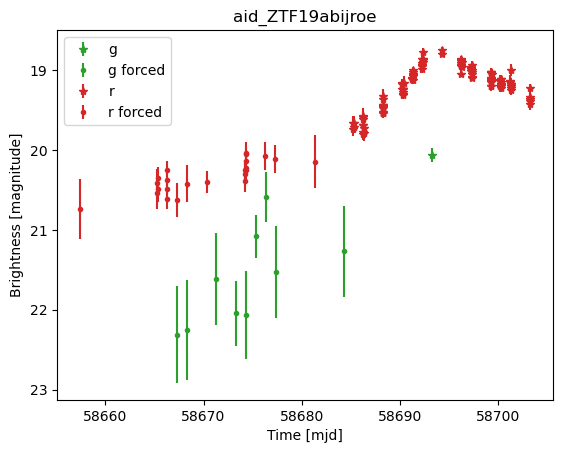

In [25]:
plot_astro_object(selected_ulens_astro_object, unit='magnitude', use_forced_phot=True)

In [15]:
from lc_classifier.features.extractors.ulens_extractor import MicroLensExtractor

In [16]:
ulens_extractor = MicroLensExtractor(bands=['g', 'r'])

In [26]:
ulens_extractor.compute_features_single_object(selected_ulens_astro_object)
selected_ulens_astro_object.features

,name,value,fid,sid,version
0,ulens_u0,0.049739,g,ztf,1.0.0
1,ulens_tE,99.998583,g,ztf,1.0.0
2,ulens_fs,1.000000,g,ztf,1.0.0
3,ulens_chi,1.995167,g,ztf,1.0.0
4,ulens_u0,0.173555,r,ztf,1.0.0
5,ulens_tE,31.932870,r,ztf,1.0.0
6,ulens_fs,0.999997,r,ztf,1.0.0
7,ulens_chi,1.953657,r,ztf,1.0.0


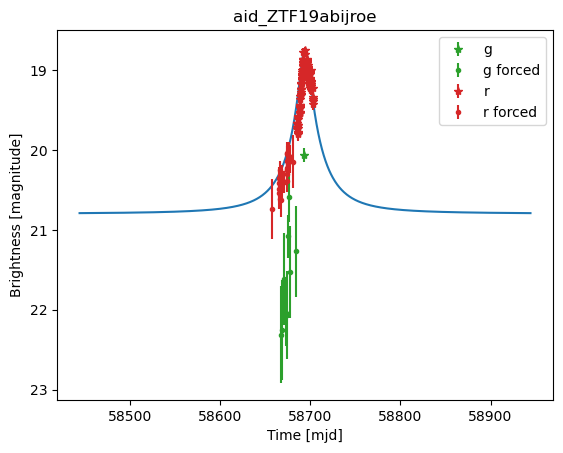

In [29]:
t = np.linspace(-250, 250, 1000)
mag = ulens_model_jax(t, u0=0.173, tE=31.93, fs=0.999, t0=0, mag_0=20.8)

det = selected_ulens_astro_object.detections
det = det[det['unit'] == 'magnitude']
mjd_of_max = det.sort_values('brightness').iloc[0]['mjd']

plt.plot(t + mjd_of_max, mag)
plot_astro_object(selected_ulens_astro_object, unit='magnitude', use_forced_phot=True)

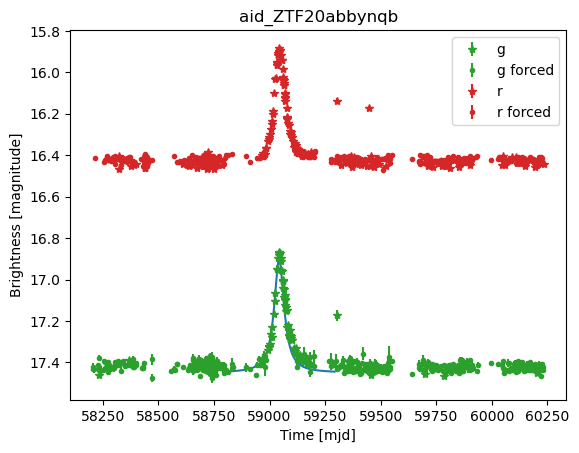

In [22]:
t = np.linspace(-250, 250, 1000)
mag = ulens_model_jax(t, u0=0.72, tE=28.99, fs=0.76, t0=0, mag_0=17.45)

det = selected_ulens_astro_object.detections
det = det[det['unit'] == 'magnitude']
mjd_of_max = det.sort_values('brightness').iloc[0]['mjd']

plt.plot(t + mjd_of_max, mag)
plot_astro_object(selected_ulens_astro_object, unit='magnitude', use_forced_phot=True)